## Applying Simple Numerical Integration Techniques
Below is the formula for the n-th order Bessel function. We will compare using Simpson's rule with 1000 slices to numerically solve Bessel functions to the built in scipy Bessel functions.

\begin{align} J_n(x) = \frac{1}{\pi}\int_0^{\pi}\cos(n\phi-x\sin\phi)d\phi \end{align}

In [1]:
from numpy import cos, sin, pi, linspace
from pylab import figure, plot, title, legend, show
from scipy.special import jv

In [2]:
# integrand for n-th order Bessel funciton
def integrand(phi, n, x):
    return cos(n*phi - x*sin(phi))/pi

In [3]:
# Simpson's rule for numerical integration
def simpsons(a, b, N, n, x):
    h = (b-a)/N          # interval slice width
    
    s = integrand(a, n, x) + integrand(b, n, x)
    for i in range(1, N, 2):
        s += 4*integrand(a + i*h, n, x)
    for j in range(2, N-1, 2):
        s += 2*integrand(a + j*h, n, x)
    
    return h*s/3.

In [4]:
# n-th order bessel function
def bessel(n, x):
    return simpsons(0., pi, 1000, n, x)

In [5]:
# initialize array for plotting
x = linspace(0, 20, 101)

In [6]:
# Bessel functions orders 0, 3, and 5
J0 = bessel(0, x)
J3 = bessel(3, x)
J5 = bessel(5, x)

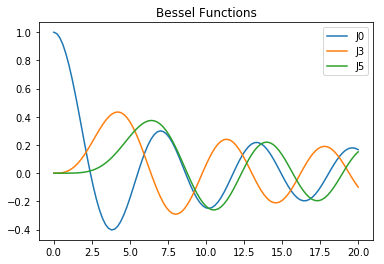

In [7]:
%matplotlib inline
title('Bessel Functions')
plot(x, J0, x, J3, x, J5)
legend(('J0', 'J3', 'J5'))

In [8]:
# scipy Bessel function values
jvJ0 = jv(0, x)
jvJ3 = jv(3, x)
jvJ5 = jv(5, x)

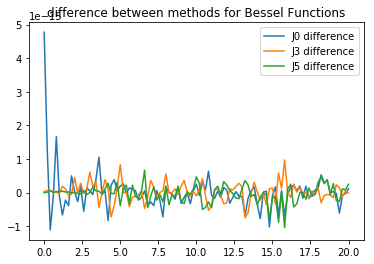

In [9]:
title('difference between methods for Bessel Functions')
plot(x, jvJ0 - J0, x, jvJ3 - J3, x, jvJ5 - J5)
legend(('J0 difference', 'J3 difference', 'J5 difference'))

## 3d Plot
Below is the wave equation and a general solution to the wave equation on a circular membrane of radius R. I will plot U_(3, 2) at t = 0 to provide a snapshot of what the membrane could look like.

\begin{gather}
\frac{\partial^2u}{\partial t^2} = c^2\Delta u \\
u_{mn} = J_n\left(\frac{z_{mn}r}{R}\right)\cos(n\theta)\cos\left(\frac{cz_{mn}t}{a}\right) 
\end{gather}

In [10]:
from numpy import meshgrid, arctan, arange, sqrt
from pylab import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

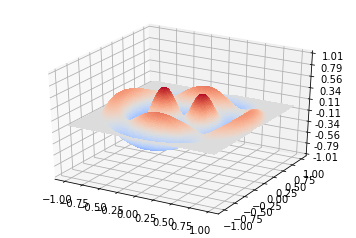

In [11]:
fig = figure(1)
ax = fig.gca(projection='3d')
R0 = 1          # radius of membrane

X = arange(-R0, R0, 0.01*R0)
Y = arange(-R0, R0, 0.01*R0)
X, Y = meshgrid(X, Y)
R = sqrt(X**2 + Y**2)
theta = arctan(Y/X)

# wave equation on circular membrane U_(3, 2) (t=0)
z_32 = 11.620
U = bessel(2, z_32*R/R0)*cos(2*theta)
U[R>R0] = 0.     # only plot to radius R0
surf = ax.plot_surface(X, Y, U, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))